## patent-stochastic-gradient-descent-6HA_alloys

### Data Dictionary

df_patents (dataframe)

### Load dataframe and strip the non-numeric data. 

In [1]:
import numpy as np
import pandas as pd

df_patents = pd.read_csv('/Users/stevehansen/Desktop/output_alloy_data_total.csv')


# Drop unwanted columns 

df_patents = df_patents.drop(['Unnamed: 0'], axis=1)
df_patents = df_patents.drop(['num_patent'], axis=1)


# Revers the order of the dataframe. 
df_patents = df_patents.iloc[::-1]

# Renumber the index so that the plots are numbered correctly. 

df_patents = df_patents.reset_index()
del df_patents['index']

print (df_patents)       # Looks okay.


      patent_no                                       url  \
0       3930575  https://www.google.com/patents/US3930575   
1       3930848  https://www.google.com/patents/US3930848   
2       3930895  https://www.google.com/patents/US3930895   
3       3930899  https://www.google.com/patents/US3930899   
4       3930904  https://www.google.com/patents/US3930904   
5       3930962  https://www.google.com/patents/US3930962   
6       3930964  https://www.google.com/patents/US3930964   
7       3930965  https://www.google.com/patents/US3930965   
8       3930966  https://www.google.com/patents/US3930966   
9       3933473  https://www.google.com/patents/US3933473   
10      3933481  https://www.google.com/patents/US3933481   
11      3933483  https://www.google.com/patents/US3933483   
12      3933484  https://www.google.com/patents/US3933484   
13      3933531  https://www.google.com/patents/US3933531   
14      3933961  https://www.google.com/patents/US3933961   
15      3935007  https:/

### Save as df_patents.

In [2]:
df_patents.describe()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le
count,10137.000000,10137.000000,10137.000000,10137.000000,10137.000000,10137.000000
mean,2.919108,12.997139,3.212785,15.647036,16.174213,4.176186
std,1.818188,24.138194,8.621308,41.604616,10.058189,2.722414
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.000000,5.000000,0.000000,2.000000,9.000000,2.000000
50%,3.000000,8.000000,0.000000,7.000000,14.000000,4.000000
75%,4.000000,15.000000,3.000000,18.000000,20.000000,6.000000
max,18.000000,981.000000,218.000000,2341.000000,116.000000,22.000000


In [ ]:
df_patents.sort_values(['num_rb'], ascending=[1])

### Prepare to plot various quantities. 

In [3]:
num_inventors = []
num_pcs = []
num_npcs = []
num_rbs = []
num_classes = []
num_les = []

# Number of patent citations, num_pc. 
value  = (df_patents['num_pc'])
num_pcs.append(value)  
    
# Number of forward citations, num_rb.
value  = (df_patents['num_rb'])
num_rbs.append(value)

# Number of inventors, num_inventor.
value  = (df_patents['num_inventor'])
num_inventors.append(value)

# Number of non-patent citations, num_npc.
value  = (df_patents['num_npc'])
num_npcs.append(value)

# Number of legal events, num_le.
value  = (df_patents['num_le'])
num_les.append(value)

# Number of classifications, num_class
value  = (df_patents['num_class'])
num_classes.append(value)

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Plot No. of Forward Citations vs. other variables. 

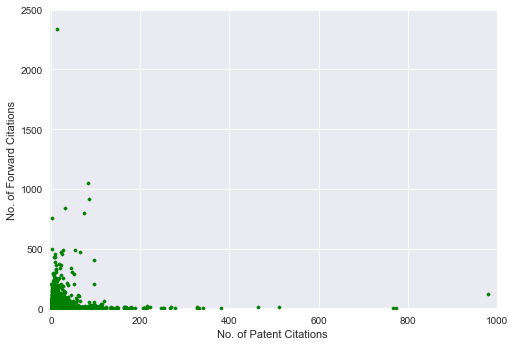

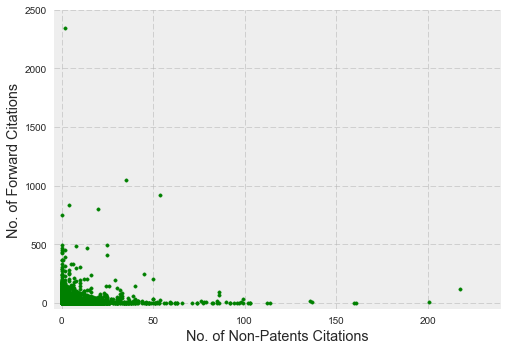

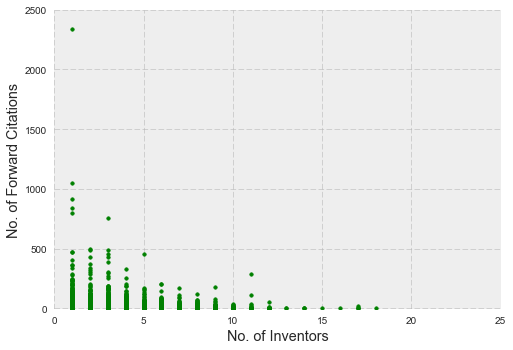

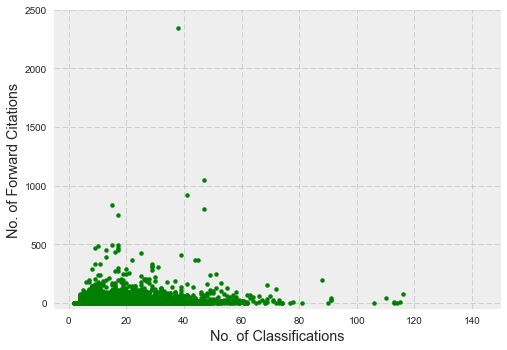

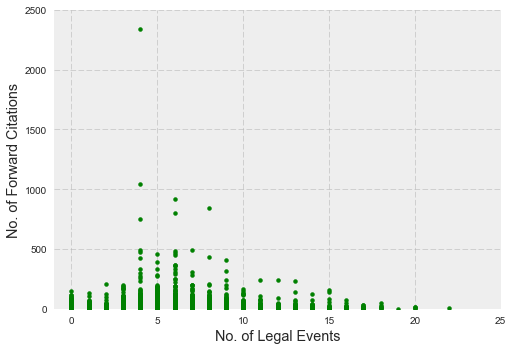

In [5]:
# No. of forward patent citations vs. No. of back patent references. 

plt.scatter(num_pcs, num_rbs, marker = 'o', color = 'green', s = 11 )
plt.xlabel("No. of Patent Citations ")
plt.ylabel("No. of Forward Citations")
plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-2,1000), ylim = (-5,2500))
plt.savefig('rbs-vw-pcs.png',dpi=600)

plt.show()


# Number of forward citations vs. number of (back) non-patent citations. 

plt.scatter(num_npcs, num_rbs,  marker = 'o', color = 'green', s = 11)
plt.xlabel("No. of Non-Patents Citations")
plt.ylabel("No. of Forward Citations")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-4,240), ylim = (-50,2500))
plt.savefig('rbs-vs-npcs.png',dpi=800)
plt.show()


# Number of inventors vs. number of forward citations. 

plt.scatter(num_inventors, num_rbs,  marker = 'o', color = 'green', s = 13 )
plt.xlabel("No. of Inventors")
plt.ylabel("No. of Forward Citations")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(0,25), ylim = (-5,2500))
plt.savefig('rbs-vs-inventors.png',dpi=600)

plt.show()


# Plot the number forward references vs. number of classifications. 

plt.scatter(num_classes, num_rbs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Classifications")
plt.ylabel("No. of Forward Citations")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-5,150), ylim = (-50,2500))
plt.savefig('rbs-vs-classes.png',dpi=600)
plt.show()


# Plot the number of forward citations vs. number of legal events.  

plt.scatter(num_les, num_rbs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Legal Events")
plt.ylabel("No. of Forward Citations")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-1,25), ylim = (0,2500))
plt.savefig('rbs-vs-legal_events.png',dpi=600)
plt.show()



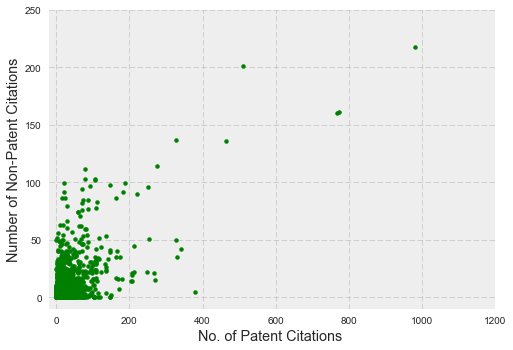

In [6]:
# Plot the number of Patent Citation versus Non-Patent Citations. 

plt.scatter(num_pcs, num_npcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Citations ")
plt.ylabel("Number of Non-Patent Citations")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-20,1200), ylim = (-10,250))

plt.show()

### Correlation plots. 

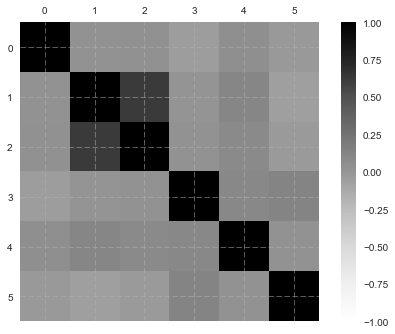

In [7]:
names = ['num_inventor', 'num_pc', 'num_npc', 'num_rb', 'num_class', 'num_le']

import seaborn as sns
correlations = df_patents.corr()

fig = plt.figure()
ax = fig.add_subplot(111) 
cax = ax.matshow(correlations, vmin= -1, vmax = 1)
fig.colorbar(cax)
plt.savefig('correlation_plot.png',dpi=600)
plt.show()
 

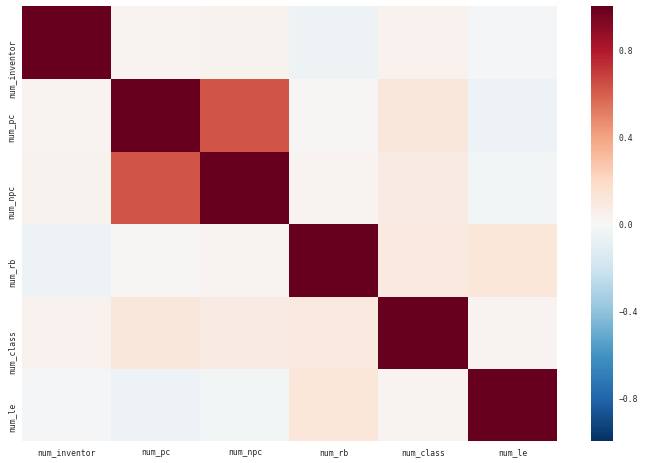

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations.

corr = df_patents.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))


sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [9]:
df_patents.corr()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le
num_inventor,1.000000,0.029405,0.035690,-0.047597,0.041307,-0.015896
num_pc,0.029405,1.000000,0.625528,0.015457,0.116630,-0.058295
num_npc,0.035690,0.625528,1.000000,0.029300,0.082055,-0.028718
num_rb,-0.047597,0.015457,0.029300,1.000000,0.099630,0.121822
num_class,0.041307,0.116630,0.082055,0.099630,1.000000,0.029785
num_le,-0.015896,-0.058295,-0.028718,0.121822,0.029785,1.000000


### Build stochastic gradient descent mode.   Normalize the input variables. 

In [10]:

# Redefined df_patents without non-numeric data columns. 

df_patents.drop('patent_no', axis=1,inplace=True)
df_patents.drop('url', axis=1, inplace=True)
df_patents.drop('title', axis=1, inplace=True)
df_patents.drop('issue_date', axis=1, inplace=True)
df_patents.drop('date', axis=1, inplace=True)

print (df_patents)

       num_inventor  num_pc  num_npc  num_rb  num_class  num_le
0                 3       6        2       2          5       0
1                 1       1        0       0          5       0
2                 2       7        0      35         11       0
3                 3       5        0       3         15       0
4                 3       7        0       8          5       0
5                 2       2        0       5          6       3
6                10       6        0       1         17       0
7                 1       5        2       6          8       0
8                 4       8        2      17          6       0
9                 1       7        0       6         12       0
10                1       1        0       0         12       0
11                4       2        0      21          4       0
12                1       1        0      19         11       3
13                2       4        0      34         14       1
14                1       2        0    

### Scale dataset to between 0 and 1. 

In [11]:
# Use sklearn to normalize data to between 0 and 1.  

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_patents) 
df_patents.loc[:,:] = scaled_values

In [12]:
# df_SGD = stochastic gradient descent model for analyzing data. 

df_SGD = df_patents 
print (df_SGD.head(20))

    num_inventor    num_pc   num_npc    num_rb  num_class    num_le
0       0.117647  0.006116  0.009174  0.000854   0.026316  0.000000
1       0.000000  0.001019  0.000000  0.000000   0.026316  0.000000
2       0.058824  0.007136  0.000000  0.014951   0.078947  0.000000
3       0.117647  0.005097  0.000000  0.001282   0.114035  0.000000
4       0.117647  0.007136  0.000000  0.003417   0.026316  0.000000
5       0.058824  0.002039  0.000000  0.002136   0.035088  0.136364
6       0.529412  0.006116  0.000000  0.000427   0.131579  0.000000
7       0.000000  0.005097  0.009174  0.002563   0.052632  0.000000
8       0.176471  0.008155  0.009174  0.007262   0.035088  0.000000
9       0.000000  0.007136  0.000000  0.002563   0.087719  0.000000
10      0.000000  0.001019  0.000000  0.000000   0.087719  0.000000
11      0.176471  0.002039  0.000000  0.008971   0.017544  0.000000
12      0.000000  0.001019  0.000000  0.008116   0.078947  0.136364
13      0.058824  0.004077  0.000000  0.014524  

### Try feature engineering.   Replace 0's with the mean value. 

In [13]:
df_patents['num_pc'] = df_patents['num_pc'].replace(0,df_patents['num_pc'].mean())
df_patents['num_npc'] = df_patents['num_npc'].replace(0,df_patents['num_npc'].mean())
df_patents['num_inventor'] = df_patents['num_inventor'].replace(0,df_patents['num_inventor'].mean())
df_patents['num_le'] = df_patents['num_le'].replace(0,df_patents['num_le'].mean())
df_patents['num_class'] = df_patents['num_class'].replace(0,df_patents['num_class'].mean())

In [22]:
# Create new num_inventor feature. 

new_factors = []

value  =  np.log(df_patents['num_inventor']**2)
# print (value)

new_factors.append(value)
for row in df_patents.iterrows():
    df_patents['num_inventor1'] = value


In [23]:
# Create new num_pc feature.  

new_factors = []

#value  =  np.log(df_patents['num_pc'] / df_patents['num_inventor']**2)

value  =  np.log(df_patents['num_pc'] * df_patents['num_npc'])
# print (value)

new_factors.append(value)
for row in df_patents.iterrows():
    df_patents['num_pc1'] = value

In [24]:
# Create new num_le feature. 

new_factors = []

value  =  np.log(df_patents['num_le'])
# print (value)

new_factors.append(value)
for row in df_patents.iterrows():
    df_patents['num_le1'] = value

In [25]:
# Create new num_npc feature. 

new_factors = []

value  =  np.log(df_patents['num_npc']/df_patents['num_inventor']**2)
# print (value)

new_factors.append(value)
for row in df_patents.iterrows():
    df_patents['num_npc1'] = value


In [26]:
# Create new num_class feature.  

new_factors = []

value  =  0.333 ** df_patents['num_class'] 
# print (value)

new_factors.append(value)
for row in df_patents.iterrows():
    df_patents['num_class1'] = value

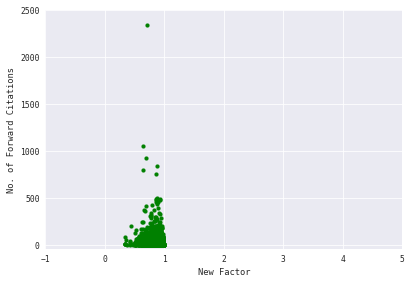

In [19]:
plt.scatter(new_factors, num_rbs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("New Factor")
plt.ylabel("No. of Forward Citations")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-1,5), ylim = (-50,2500))
plt.show()

In [27]:
df_patents.corr()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le,num_pc1,num_le1,num_npc1,num_inventor1,num_class1
num_inventor,1.000000,0.023475,0.018333,-0.033419,0.018533,-0.041709,0.044818,-0.041122,-0.774069,0.929387,-0.020580
num_pc,0.023475,1.000000,0.624567,0.015717,0.115702,-0.101322,0.611545,-0.142756,0.166604,0.026615,-0.118024
num_npc,0.018333,0.624567,1.000000,0.034678,0.072087,-0.052441,0.621834,-0.066342,0.387725,0.023993,-0.074356
num_rb,-0.033419,0.015717,0.034678,1.000000,0.099208,0.131991,0.035884,0.150835,0.050340,-0.028843,-0.100141
num_class,0.018533,0.115702,0.072087,0.099208,1.000000,-0.016015,0.168841,-0.011317,0.017319,0.020505,-0.993480
num_le,-0.041709,-0.101322,-0.052441,0.131991,-0.016015,1.000000,-0.086917,0.908351,0.033000,-0.041031,0.016033
num_pc1,0.044818,0.611545,0.621834,0.035884,0.168841,-0.086917,1.000000,-0.134440,0.361609,0.045654,-0.172537
num_le1,-0.041122,-0.142756,-0.066342,0.150835,-0.011317,0.908351,-0.134440,1.000000,0.025493,-0.038370,0.010172
num_npc1,-0.774069,0.166604,0.387725,0.050340,0.017319,0.033000,0.361609,0.025493,1.000000,-0.832356,-0.015912
num_inventor1,0.929387,0.026615,0.023993,-0.028843,0.020505,-0.041031,0.045654,-0.038370,-0.832356,1.000000,-0.022418


### Feature engineering transformations.

In [ ]:
num_le * num_class        gives correlation of +0.089    lower than either num_le or num_class alone 

num_le ** 2               gives correlation of -0.100    lower than num_le alone 
num_le ** 0.5             gives correlation of +0.110    slightly lower than num_le alone 
num_inventor ** 0.5       gives correlation of -0.048    same

num_inventor + num_le     gives correlation of +0.062    higher than num_inventor and lower than num_le 

num_pc/num_npc            gives correlation of -0.030    slightly higher than either num_pc and num_npc
num_le/num_inventor       gives correlation of +0.144    higher than either num_le and num_inventor
num_inventor/num_npc      gives correlation of -0.051    slightly higher than either num_inventor or num_npc

1/num_le                  gives correlation of -0.142    higher than num_le alone 
1/num_le ** 2             gives correlation of -0.125    slightly higher than num_le alone 
1/num_inventor            gives correlation of +0.037    slightly lower than num_inventor alone 
1/num_npc                 gives correlation of -0.050    less than double the correlation of num_npc alone  
1/num_class               gives correlation of -0.067    much less than num_class alone 

log (num_npc)             gives correlation of +0.056    almost double 
log (num_le)              gives correlation of +0.152    better than num_le alone by 25% 
log (num_class)           gives correlation of +0.090    slightly lower than the original value of 0.100 
log (num_pc)              gives correlation of +0.015    almost the same as num_pc alone 
log (inventor)            gives correlation of -0.043    slightly lower than num_inventor 

exp(num_inventor)         gives correlation of +0.049    slightly better than num_inventor by itself 

log(num_inventor/num_npc) gives correlation of -0.066    better than either one separately 

log(num_pc * num_npc)     gives correlation of +0.051    better than num_pc and num_npc added together 

num_npc    is improved     by log (num_npc)  
num_le     is improved     by log (num_le)   ***

num_class  -0.25*df_patents['num_class']**2 + 0.5*df_patents['num_class'] + np.exp(df_patents['num_class'])   0.097
num_class  -0.25*df_patents['num_class']**2 + 0.5*df_patents['num_class'] + np.exp(-df_patents['num_class'])  0.9999
num_class    np.tanh(0.5*df_patents['num_class']) + 3                                                           0.1008
num_class    np.exp(-1/kd) ** df_patents['num_class']  + 4                                                     -0.1006


### Build stochastic gradient descent model. 

In [37]:
#from sklearn.linear_model import SGDRegressor

from sklearn.linear_model.stochastic_gradient import SGDRegressor

In [38]:
SGDRegressor(loss='huber', 
             penalty='elasticnet', 
             alpha=0.01, 
             l1_ratio=0.25, 
             learning_rate='invscaling',
             fit_intercept=True, 
             n_iter=400, 
             shuffle=True, 
             verbose=0,
             warm_start=False,
             epsilon=2.00,
             random_state=None)

SGDRegressor(alpha=0.01, average=False, epsilon=2.0, eta0=0.01,
       fit_intercept=True, l1_ratio=0.25, learning_rate='invscaling',
       loss='huber', n_iter=400, penalty='elasticnet', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [39]:
X = df_SGD[['num_inventor', 'num_pc1', 'num_npc1', 'num_class1', 'num_le1']]
y = df_SGD['num_rb']

sgd = SGDRegressor()
sgd = sgd.fit(X, y)
y_pred = sgd.predict(X)


In [40]:
errors = [] 
ys = []

# Number of y_preds in a list
value  = sgd.predict(X)
errors.append(value)
ys.append(y)
error = y - y_pred

#print (error)

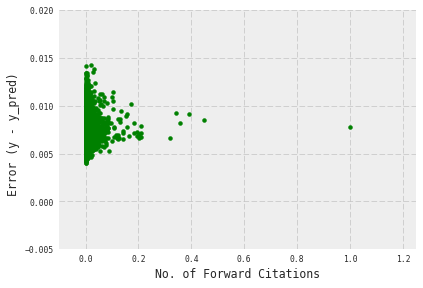

In [34]:
# Plot the number of Patent Citation versus Non-Patent Citations. 

plt.scatter(ys, errors,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Forward Citations")
plt.ylabel("Error (y - y_pred) ")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-0.1,1.25), ylim = (-0.005,0.02))
plt.savefig('num_rb-vs-error.png',dpi=600)
plt.show()

### Plots 

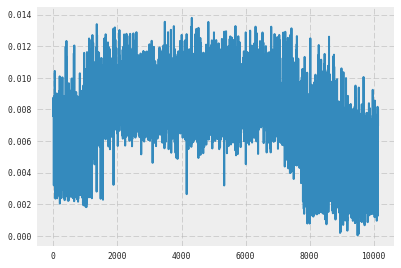

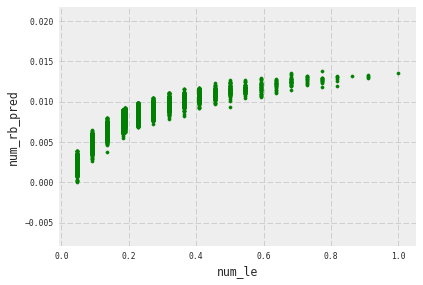

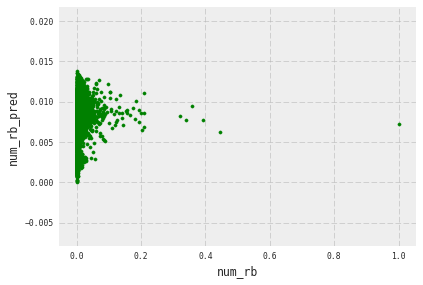

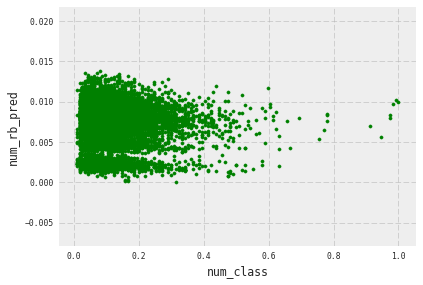

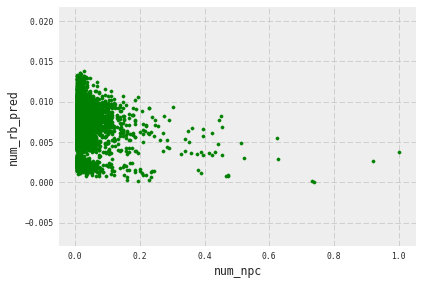

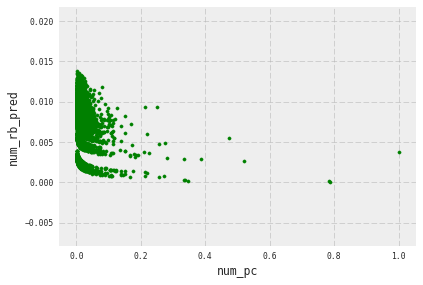

In [45]:
# Plot the y_pred.  

plt.plot(y_pred)
plt.savefig('y_pred_SGD.png',dpi=1200)
plt.show()


df_SGD['num_rb_pred'] = y_pred
df_SGD.plot(kind='scatter', x='num_le', y='num_rb_pred', marker = 'o', color = 'green', s = 10)

plt.savefig('hobson1.png',dpi=600)


df_SGD.plot(kind='scatter', x='num_rb', y='num_rb_pred', marker = 'o', color = 'green', s = 10)
plt.savefig('hobson2.png',dpi=600)


df_SGD['num_rb_pred'] = y_pred
df_SGD.plot(kind='scatter', x='num_class', y='num_rb_pred', marker = 'o', color = 'green', s = 10)
plt.savefig('hobson3.png',dpi=600)


df_SGD.plot(kind='scatter', x='num_npc', y='num_rb_pred', marker = 'o', color = 'green', s = 10)
plt.savefig('hobson4.png',dpi=600)


df_SGD.plot(kind='scatter', x='num_pc', y='num_rb_pred', marker = 'o', color = 'green', s = 10)
plt.savefig('hobson5.png',dpi=600)

### Results with original (untransformed) data. 

In [36]:
df_patents.corr()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le,num_pc1,num_le1,num_npc1,num_inventor1,num_class1,num_rb_pred
num_inventor,1.000000,0.023475,0.018333,-0.033419,0.018533,-0.041709,0.044818,-0.041122,-0.774069,0.929387,-0.020580,-0.140350
num_pc,0.023475,1.000000,0.624567,0.015717,0.115702,-0.101322,0.611545,-0.142756,0.166604,0.026615,-0.118024,-0.000172
num_npc,0.018333,0.624567,1.000000,0.034678,0.072087,-0.052441,0.621834,-0.066342,0.387725,0.023993,-0.074356,0.034795
num_rb,-0.033419,0.015717,0.034678,1.000000,0.099208,0.131991,0.035884,0.150835,0.050340,-0.028843,-0.100141,0.168313
num_class,0.018533,0.115702,0.072087,0.099208,1.000000,-0.016015,0.168841,-0.011317,0.017319,0.020505,-0.993480,0.466702
num_le,-0.041709,-0.101322,-0.052441,0.131991,-0.016015,1.000000,-0.086917,0.908351,0.033000,-0.041031,0.016033,0.868260
num_pc1,0.044818,0.611545,0.621834,0.035884,0.168841,-0.086917,1.000000,-0.134440,0.361609,0.045654,-0.172537,0.031761
num_le1,-0.041122,-0.142756,-0.066342,0.150835,-0.011317,0.908351,-0.134440,1.000000,0.025493,-0.038370,0.010172,0.789340
num_npc1,-0.774069,0.166604,0.387725,0.050340,0.017319,0.033000,0.361609,0.025493,1.000000,-0.832356,-0.015912,0.143198
num_inventor1,0.929387,0.026615,0.023993,-0.028843,0.020505,-0.041031,0.045654,-0.038370,-0.832356,1.000000,-0.022418,-0.130512


### Results with original (transformed) data (except num_inventors).

In [42]:
df_patents.corr()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le,num_pc1,num_le1,num_npc1,num_inventor1,num_class1,num_rb_pred
num_inventor,1.000000,0.023475,0.018333,-0.033419,0.018533,-0.041709,0.044818,-0.041122,-0.774069,0.929387,-0.020580,-0.132871
num_pc,0.023475,1.000000,0.624567,0.015717,0.115702,-0.101322,0.611545,-0.142756,0.166604,0.026615,-0.118024,-0.253858
num_npc,0.018333,0.624567,1.000000,0.034678,0.072087,-0.052441,0.621834,-0.066342,0.387725,0.023993,-0.074356,-0.132507
num_rb,-0.033419,0.015717,0.034678,1.000000,0.099208,0.131991,0.035884,0.150835,0.050340,-0.028843,-0.100141,0.138546
num_class,0.018533,0.115702,0.072087,0.099208,1.000000,-0.016015,0.168841,-0.011317,0.017319,0.020505,-0.993480,-0.068294
num_le,-0.041709,-0.101322,-0.052441,0.131991,-0.016015,1.000000,-0.086917,0.908351,0.033000,-0.041031,0.016033,0.877865
num_pc1,0.044818,0.611545,0.621834,0.035884,0.168841,-0.086917,1.000000,-0.134440,0.361609,0.045654,-0.172537,-0.300285
num_le1,-0.041122,-0.142756,-0.066342,0.150835,-0.011317,0.908351,-0.134440,1.000000,0.025493,-0.038370,0.010172,0.974313
num_npc1,-0.774069,0.166604,0.387725,0.050340,0.017319,0.033000,0.361609,0.025493,1.000000,-0.832356,-0.015912,0.087421
num_inventor1,0.929387,0.026615,0.023993,-0.028843,0.020505,-0.041031,0.045654,-0.038370,-0.832356,1.000000,-0.022418,-0.151333
